In [15]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

from PIL import Image

# Quadratic Function Fitting using Least Squares

$$y=ax^2+bx+c$$

Find a, b, c  using LS by given 11 2D points, and plot it.


$A^-1 * A$^-1 * A

In [64]:
PointsX = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
PointsY = np.array([2.8, 1.0, -1.0, -2.3, -2.7, -3.0, -3.2, -2.0, -1.0, 0.4, 3.0])
Weights = np.array([1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1])

## 1.가중치 없이 그냥

In [65]:
A1 = np.stack([PointsX ** 2, PointsX, np.ones(PointsX.shape)], axis=1)
a, b, c = inv(A1.T @ A1) @ A1.T @ PointsY
print(a, b, c)

0.2404428904428904 -0.011818181818181797 -3.1317016317016315


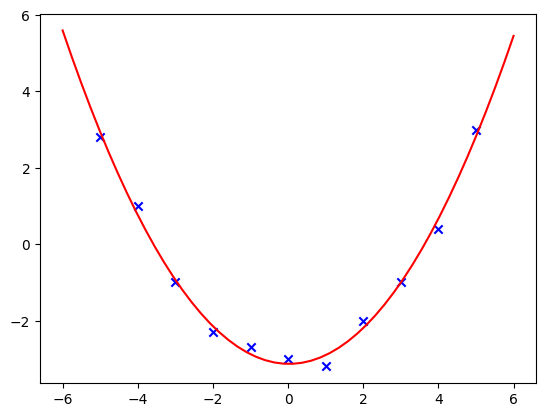

In [66]:
X = np.linspace(-6, 6)
Y = a * X ** 2 + b * X + c

plt.scatter(PointsX, PointsY, c='blue', marker='x')

plt.plot(X, Y, color='red')

## Using 11 Points with W

In [67]:
A2 = np.stack([Weights * PointsX ** 2, Weights * PointsX, Weights * np.ones(PointsX.shape)], axis=1)

YW = Weights * PointsY

a, b, c = inv(A2.T @ A2) @ A2.T @ YW
print(a, b, c)

0.23960453432951184 -0.002631578947368457 -3.120095323972691


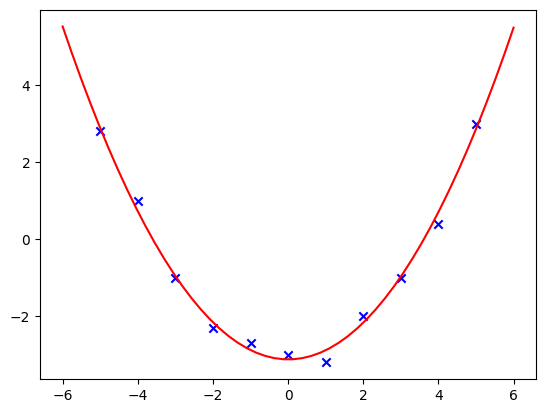

In [68]:
X = np.linspace(-6, 6)
Y = a * X ** 2 + b * X + c

plt.scatter(PointsX, PointsY, c='blue', marker='x')

plt.plot(X, Y, color='red')

## Using left 8

In [81]:
A3 = np.stack([PointsX[0:8] ** 2, PointsX[0:8], np.ones(PointsX[0:8].shape)], axis=1)

Y3 = PointsY[0:8]

a, b, c = inv(A3.T @ A3) @ A3.T @ Y3
print(a, b, c)

0.2404761904761903 -0.004761904761905439 -3.110714285714285


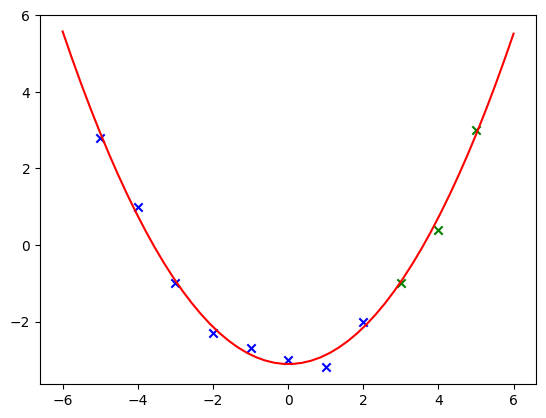

In [82]:
X = np.linspace(-6, 6)
Y = a * X ** 2 + b * X + c

plt.scatter(PointsX[0:8], PointsY[0:8], c='blue', marker='x')
plt.scatter(PointsX[8:], PointsY[8:], c='green', marker='x')

plt.plot(X, Y, color='red')

## Using right 8

In [83]:
A4 = np.stack([PointsX[3:] ** 2, PointsX[3:], np.ones(PointsX[3:].shape)], axis=1)

Y4 = PointsY[3:]

a, b, c = inv(A4.T @ A4) @ A4.T @ Y4
print(a, b, c)

0.24166666666666647 -0.013095238095237466 -3.1428571428571423


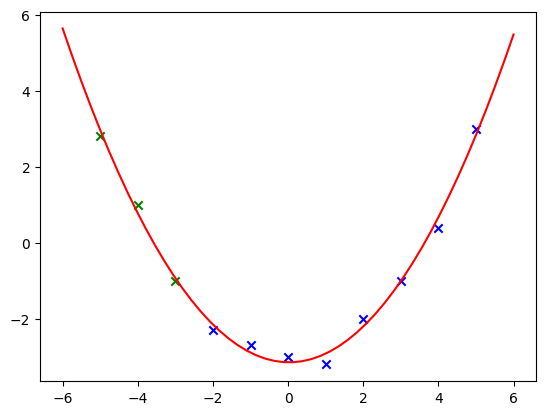

In [84]:
X = np.linspace(-6, 6)
Y = a * X ** 2 + b * X + c

plt.scatter(PointsX[3:], PointsY[3:], c='blue', marker='x')
plt.scatter(PointsX[:3], PointsY[:3], c='green', marker='x')

plt.plot(X, Y, color='red')

# Multi-lines Fitting using Least Squares

$y=ax+b$

Find $a$, $b$ using LS: Find the intersections of red and green respectively.

## How to do?
1. Select some 2D points at pixel coordinates on the same line, and find the optimal line equation using LS
2. Repeat 1 for other lines in the same direction
3. Find the intersections of lines in (1)-(2) in the same direction
4. Repeat (1)-(3) for other directions(red/green)